In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
#import needed libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from tensorflow import keras
from keras.models import load_model,Sequential
from keras.preprocessing.image import ImageDataGenerator as Imgen
from keras.preprocessing import image
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

from PIL import Image
from sklearn.metrics import classification_report,confusion_matrix

import os

2022-12-22 08:34:24.021074: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [ ]:
!pip install split-folders --upgrade --quiet

In [ ]:
import splitfolders
splitfolders.ratio("./flowers",output="Tr-Te-Val",ratio=(0.8,0.1,0.1))

## Image data from the folders using Image Data Generator with desnet preprocessing


In [ ]:
train_gen = Imgen(preprocessing_function=keras.applications.densenet.preprocess_input,
                 zoom_range=0.2,
                  shear_range=0.2,
                  vertical_flip=True,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  fill_mode='nearest'
                 )

val_gen = Imgen(preprocessing_function=keras.applications.densenet.preprocess_input,
                 zoom_range=0.2,
                  shear_range=0.2,
                  vertical_flip=True,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  fill_mode='nearest'
                 )

test_gen = Imgen(preprocessing_function=keras.applications.densenet.preprocess_input
                 )

In [ ]:
train_ds = train_gen.flow_from_directory("./Tr-Te-Val/train",
                                       target_size=(331,331),
                                        seed = 123,
                                        batch_size=32
                                       )

val_ds = val_gen.flow_from_directory("./Tr-Te-Val/val",
                                       target_size=(331,331),
                                        seed = 123,
                                        batch_size=32)

test_ds = test_gen.flow_from_directory("./Tr-Te-Val/test",
                                       target_size=(331,331),
                                        seed = 123,
                                        batch_size=32,
                                      shuffle=False
                                      )

In [ ]:
a = train_ds.class_indices
classes = list(a.keys())
classes

## Extracting one batch from datagen for visualization purposes

In [ ]:
#one batch
X,Y = next(train_ds)

In [ ]:
#plot function
def plot_images(img,labels):
    plt.figure(figsize=(15,10))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(img[i])
        plt.title(classes[np.argmax(labels[i])])
        plt.axis('off')

In [ ]:
plot_images(X,Y)

## Using Transfer Learning to build the Model - model used is Desnet201

In [ ]:
from keras.applications.densenet import DenseNet201

In [ ]:
base_model = DenseNet201(include_top=False,
                  input_shape=(331,331,3),
                   weights = 'imagenet',
                    pooling='avg'
                  )
base_model.trainable = False

In [ ]:
inputs = base_model.input
l1 = Dense(128,activation='relu')(base_model.output)
outputs = Dense(5,activation='softmax')(l1)
model = keras.Model(inputs=inputs,outputs=outputs)

In [ ]:
#compile 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#callbacks
my_calls = [keras.callbacks.EarlyStopping(monitor='val_loss',patience=3),
            keras.callbacks.ModelCheckpoint("Model.h5",verbose=1,save_best_only=True)]

In [ ]:
hist = model.fit(train_ds,epochs=18,validation_data=val_ds,callbacks=my_calls)

In [ ]:
model = load_model("./Model.h5")

In [ ]:
#test
model.evaluate(test_ds)

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

In [ ]:
preds = model.predict(test_ds,verbose=1)

In [ ]:
pred = [np.argmax(i) for i in preds]
pred[:5]

In [ ]:
actual = test_ds.classes

In [ ]:
print(classification_report(pred,actual))

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(pred,actual),annot = True, fmt = 'd', cmap = 'Blues');

## Image data from the folders using Image Data Generator with efficientnet_v2 preprocessing

In [10]:
train_gen = Imgen(preprocessing_function=keras.applications.efficientnet_v2.preprocess_input,
                 zoom_range=0.2,
                  shear_range=0.2,
                  vertical_flip=True,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  fill_mode='nearest'
                 )

val_gen = Imgen(preprocessing_function=keras.applications.efficientnet_v2.preprocess_input,
                 zoom_range=0.2,
                  shear_range=0.2,
                  vertical_flip=True,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  fill_mode='nearest'
                 )

test_gen = Imgen(preprocessing_function=keras.applications.efficientnet_v2.preprocess_input
                 )

In [11]:
train_ds_1 = train_gen.flow_from_directory("./Tr-Te-Val/train",
                                       target_size=(331,331),
                                        seed = 123,
                                        batch_size=32
                                       )

val_ds_1 = val_gen.flow_from_directory("./Tr-Te-Val/val",
                                       target_size=(331,331),
                                        seed = 123,
                                        batch_size=32)

test_ds_1 = test_gen.flow_from_directory("./Tr-Te-Val/test",
                                       target_size=(331,331),
                                        seed = 123,
                                        batch_size=32,
                                      shuffle=False
                                      )

Found 3452 images belonging to 5 classes.
Found 430 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [12]:
from keras.applications.efficientnet_v2 import EfficientNetV2S

In [13]:
base_model = EfficientNetV2S(include_top=False,
                  input_shape=(331,331,3),
                   weights = 'imagenet',
                    pooling='avg'
                  )
base_model.trainable = False

In [14]:
inputs = base_model.input
l1 = Dense(128,activation='relu')(base_model.output)
outputs = Dense(5,activation='softmax')(l1)
model = keras.Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 331, 331, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 331, 331, 3)  0           ['input_2[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 166, 166, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                                                                                            

 block2c_expand_activation (Act  (None, 83, 83, 192)  0          ['block2c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2c_project_conv (Conv2D)  (None, 83, 83, 48)   9216        ['block2c_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block2c_project_bn (BatchNorma  (None, 83, 83, 48)  192         ['block2c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2c_drop (Dropout)         (None, 83, 83, 48)   0           ['block2c_project_bn[0][0]']     
          

                                                                  'block3b_add[0][0]']            
                                                                                                  
 block3d_expand_conv (Conv2D)   (None, 42, 42, 256)  147456      ['block3c_add[0][0]']            
                                                                                                  
 block3d_expand_bn (BatchNormal  (None, 42, 42, 256)  1024       ['block3d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3d_expand_activation (Act  (None, 42, 42, 256)  0          ['block3d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3d_p

                                                                                                  
 block4b_project_conv (Conv2D)  (None, 21, 21, 128)  65536       ['block4b_se_excite[0][0]']      
                                                                                                  
 block4b_project_bn (BatchNorma  (None, 21, 21, 128)  512        ['block4b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_drop (Dropout)         (None, 21, 21, 128)  0           ['block4b_project_bn[0][0]']     
                                                                                                  
 block4b_add (Add)              (None, 21, 21, 128)  0           ['block4b_drop[0][0]',           
                                                                  'block4a_project_bn[0][0]']     
          

                                                                                                  
 block4d_drop (Dropout)         (None, 21, 21, 128)  0           ['block4d_project_bn[0][0]']     
                                                                                                  
 block4d_add (Add)              (None, 21, 21, 128)  0           ['block4d_drop[0][0]',           
                                                                  'block4c_add[0][0]']            
                                                                                                  
 block4e_expand_conv (Conv2D)   (None, 21, 21, 512)  65536       ['block4d_add[0][0]']            
                                                                                                  
 block4e_expand_bn (BatchNormal  (None, 21, 21, 512)  2048       ['block4e_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block5a_expand_conv (Conv2D)   (None, 21, 21, 768)  98304       ['block4f_add[0][0]']            
                                                                                                  
 block5a_expand_bn (BatchNormal  (None, 21, 21, 768)  3072       ['block5a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5a_expand_activation (Act  (None, 21, 21, 768)  0          ['block5a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5a_dwconv2 (DepthwiseConv  (None, 21, 21, 768)  6912       ['block5a_expand_activation[0][0]
 2D)      

 2D)                                                             ']                               
                                                                                                  
 block5c_bn (BatchNormalization  (None, 21, 21, 960)  3840       ['block5c_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5c_activation (Activation  (None, 21, 21, 960)  0          ['block5c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5c_se_squeeze (GlobalAver  (None, 960)         0           ['block5c_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5e_activation (Activation  (None, 21, 21, 960)  0          ['block5e_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5e_se_squeeze (GlobalAver  (None, 960)         0           ['block5e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5e_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block5e_se_squeeze[0][0]']     
                                                                                                  
 block5e_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block5e_se_reshape[0][0]']     
                                                                                                  
 block5e_s

                                                                                                  
 block5g_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block5g_se_squeeze[0][0]']     
                                                                                                  
 block5g_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block5g_se_reshape[0][0]']     
                                                                                                  
 block5g_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block5g_se_reduce[0][0]']      
                                                                                                  
 block5g_se_excite (Multiply)   (None, 21, 21, 960)  0           ['block5g_activation[0][0]',     
                                                                  'block5g_se_expand[0][0]']      
                                                                                                  
 block5g_p

 block5i_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block5i_se_reduce[0][0]']      
                                                                                                  
 block5i_se_excite (Multiply)   (None, 21, 21, 960)  0           ['block5i_activation[0][0]',     
                                                                  'block5i_se_expand[0][0]']      
                                                                                                  
 block5i_project_conv (Conv2D)  (None, 21, 21, 160)  153600      ['block5i_se_excite[0][0]']      
                                                                                                  
 block5i_project_bn (BatchNorma  (None, 21, 21, 160)  640        ['block5i_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5i_d

                                                                                                  
 block6b_drop (Dropout)         (None, 11, 11, 256)  0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 11, 11, 256)  0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 11, 11, 1536  393216      ['block6b_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 11, 11, 1536  6144       ['block6c_expand_conv[0][0]']    
 ization) 

 block6d_add (Add)              (None, 11, 11, 256)  0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block6e_expand_conv (Conv2D)   (None, 11, 11, 1536  393216      ['block6d_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6e_expand_bn (BatchNormal  (None, 11, 11, 1536  6144       ['block6e_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6e_expand_activation (Act  (None, 11, 11, 1536  0          ['block6e_expand_bn[0][0]']      
 ivation) 

 block6g_expand_conv (Conv2D)   (None, 11, 11, 1536  393216      ['block6f_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6g_expand_bn (BatchNormal  (None, 11, 11, 1536  6144       ['block6g_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6g_expand_activation (Act  (None, 11, 11, 1536  0          ['block6g_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6g_dwconv2 (DepthwiseConv  (None, 11, 11, 1536  13824      ['block6g_expand_activation[0][0]
 2D)      

 block6i_expand_bn (BatchNormal  (None, 11, 11, 1536  6144       ['block6i_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6i_expand_activation (Act  (None, 11, 11, 1536  0          ['block6i_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6i_dwconv2 (DepthwiseConv  (None, 11, 11, 1536  13824      ['block6i_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block6i_bn (BatchNormalization  (None, 11, 11, 1536  6144       ['block6i_dwconv2[0][0]']        
 )        

 block6k_expand_activation (Act  (None, 11, 11, 1536  0          ['block6k_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6k_dwconv2 (DepthwiseConv  (None, 11, 11, 1536  13824      ['block6k_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block6k_bn (BatchNormalization  (None, 11, 11, 1536  6144       ['block6k_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block6k_activation (Activation  (None, 11, 11, 1536  0          ['block6k_bn[0][0]']             
 )        

 block6m_dwconv2 (DepthwiseConv  (None, 11, 11, 1536  13824      ['block6m_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block6m_bn (BatchNormalization  (None, 11, 11, 1536  6144       ['block6m_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block6m_activation (Activation  (None, 11, 11, 1536  0          ['block6m_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6m_se_squeeze (GlobalAver  (None, 1536)        0           ['block6m_activation[0][0]']     
 agePoolin

 block6o_bn (BatchNormalization  (None, 11, 11, 1536  6144       ['block6o_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block6o_activation (Activation  (None, 11, 11, 1536  0          ['block6o_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6o_se_squeeze (GlobalAver  (None, 1536)        0           ['block6o_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6o_se_reshape (Reshape)   (None, 1, 1, 1536)   0           ['block6o_se_squeeze[0][0]']     
          

In [15]:
#compile 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
#callbacks
my_calls = [keras.callbacks.EarlyStopping(monitor='val_loss',patience=3),
            keras.callbacks.ModelCheckpoint("Model_2.h5",verbose=1,save_best_only=True)]

In [17]:
hist = model.fit(train_ds_1,epochs=18,validation_data=val_ds_1,callbacks=my_calls)

Epoch 1/18


2022-12-21 06:18:13.297327: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-12-21 06:18:13.985402: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-21 06:18:13.986423: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-21 06:18:13.986460: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-12-21 06:18:13.987491: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-21 06:18:13.987581: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


108/108 [==============================] - ETA: 0s - loss: 0.4848 - accuracy: 0.8218
Epoch 1: val_loss improved from inf to 0.25942, saving model to Model_2.h5
108/108 [==============================] - 115s 930ms/step - loss: 0.4848 - accuracy: 0.8218 - val_loss: 0.2594 - val_accuracy: 0.9140
Epoch 2/18
108/108 [==============================] - ETA: 0s - loss: 0.2900 - accuracy: 0.8986
Epoch 2: val_loss did not improve from 0.25942
108/108 [==============================] - 95s 877ms/step - loss: 0.2900 - accuracy: 0.8986 - val_loss: 0.2610 - val_accuracy: 0.9116
Epoch 3/18
108/108 [==============================] - ETA: 0s - loss: 0.2535 - accuracy: 0.9134
Epoch 3: val_loss improved from 0.25942 to 0.22682, saving model to Model_2.h5
108/108 [==============================] - 96s 889ms/step - loss: 0.2535 - accuracy: 0.9134 - val_loss: 0.2268 - val_accuracy: 0.9326
Epoch 4/18
108/108 [==============================] - ETA: 0s - loss: 0.2347 - accuracy: 0.9163
Epoch 4: val_loss did n

In [18]:
model = load_model("./Model_2.h5")

In [19]:
#test
model.evaluate(test_ds_1)

14/14 [==============================] - 8s 311ms/step - loss: 0.2165 - accuracy: 0.9264


[0.2164650559425354, 0.9264367818832397]

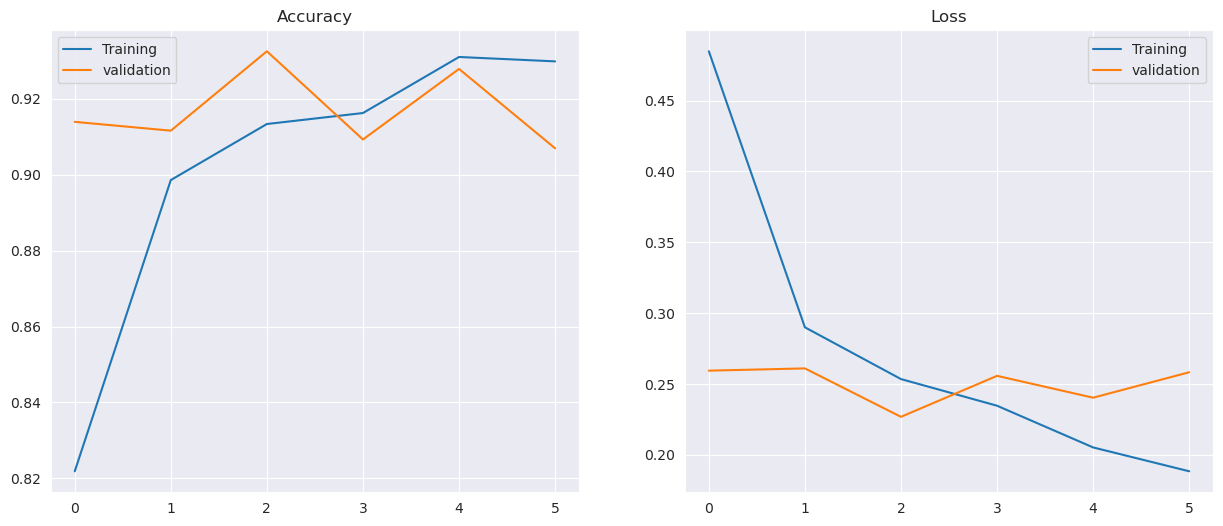

In [20]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

In [21]:
preds = model.predict(test_ds_1,verbose=1)

14/14 [==============================] - 6s 239ms/step


In [23]:
actual = test_ds_1.classes

In [26]:
pred = [np.argmax(i) for i in preds]
pred[:5]

[0, 0, 0, 0, 0]

In [27]:
print(classification_report(pred,actual))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        81
           1       0.94      0.96      0.95       104
           2       0.91      0.90      0.91        80
           3       0.93      0.93      0.93        74
           4       0.90      0.93      0.91        96

    accuracy                           0.93       435
   macro avg       0.93      0.92      0.93       435
weighted avg       0.93      0.93      0.93       435



In [3]:
train_gen_1 = Imgen(preprocessing_function=keras.applications.resnet.preprocess_input,
                 zoom_range=0.2,
                  shear_range=0.2,
                  vertical_flip=True,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  fill_mode='nearest'
                 )

val_gen_1 = Imgen(preprocessing_function=keras.applications.resnet.preprocess_input,
                 zoom_range=0.2,
                  shear_range=0.2,
                  vertical_flip=True,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  fill_mode='nearest'
                 )

test_gen_1 = Imgen(preprocessing_function=keras.applications.resnet.preprocess_input
                 )

In [4]:
train_ds_3 = train_gen_1.flow_from_directory("./Tr-Te-Val/train",
                                       target_size=(224,224),
                                        seed = 123,
                                        batch_size=32
                                       )

val_ds_3 = val_gen_1.flow_from_directory("./Tr-Te-Val/val",
                                       target_size=(224,224),
                                        seed = 123,
                                        batch_size=32)

test_ds_3 = test_gen_1.flow_from_directory("./Tr-Te-Val/test",
                                       target_size=(224,224),
                                        seed = 123,
                                        batch_size=32,
                                      shuffle=False
                                      )

Found 3452 images belonging to 5 classes.
Found 430 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [5]:
from keras.applications.resnet import ResNet50

In [6]:
base_model = ResNet50(include_top=False,
                  input_shape=(224,224,3),
                   weights = 'imagenet',
                    pooling='avg'
                  )
base_model.trainable = False

2022-12-22 08:41:29.073802: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-22 08:41:29.081110: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-22 08:41:29.081914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-22 08:41:29.082816: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

94765736/94765736 [==============================] - 1s 0us/step


In [8]:
inputs = base_model.input
l1 = Dense(128,activation='relu')(base_model.output)
outputs = Dense(5,activation='softmax')(l1)
model = keras.Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [9]:
#compile 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
#callbacks
my_calls = [keras.callbacks.EarlyStopping(monitor='val_loss',patience=4),
            keras.callbacks.ModelCheckpoint("Model_resnet.h5",verbose=1,save_best_only=True)]

In [11]:
hist = model.fit(train_ds_3,epochs=18,validation_data=val_ds_3,callbacks=my_calls)

Epoch 1/18


2022-12-22 08:42:30.633268: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-12-22 08:42:31.307378: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-22 08:42:31.308361: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-22 08:42:31.308409: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-12-22 08:42:31.309649: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-22 08:42:31.309763: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


108/108 [==============================] - ETA: 0s - loss: 0.5429 - accuracy: 0.7963
Epoch 1: val_loss improved from inf to 0.37074, saving model to Model_resnet.h5
108/108 [==============================] - 55s 463ms/step - loss: 0.5429 - accuracy: 0.7963 - val_loss: 0.3707 - val_accuracy: 0.8698
Epoch 2/18
108/108 [==============================] - ETA: 0s - loss: 0.3332 - accuracy: 0.8815
Epoch 2: val_loss improved from 0.37074 to 0.29621, saving model to Model_resnet.h5
108/108 [==============================] - 46s 425ms/step - loss: 0.3332 - accuracy: 0.8815 - val_loss: 0.2962 - val_accuracy: 0.8907
Epoch 3/18
108/108 [==============================] - ETA: 0s - loss: 0.2743 - accuracy: 0.8975
Epoch 3: val_loss did not improve from 0.29621
108/108 [==============================] - 45s 418ms/step - loss: 0.2743 - accuracy: 0.8975 - val_loss: 0.3770 - val_accuracy: 0.8791
Epoch 4/18
108/108 [==============================] - ETA: 0s - loss: 0.2456 - accuracy: 0.9151
Epoch 4: val_l

In [12]:
model = load_model("./Model_resnet.h5")

In [13]:
#test
model.evaluate(test_ds_3)

14/14 [==============================] - 3s 159ms/step - loss: 0.2942 - accuracy: 0.8897


[0.2941794693470001, 0.8896551728248596]

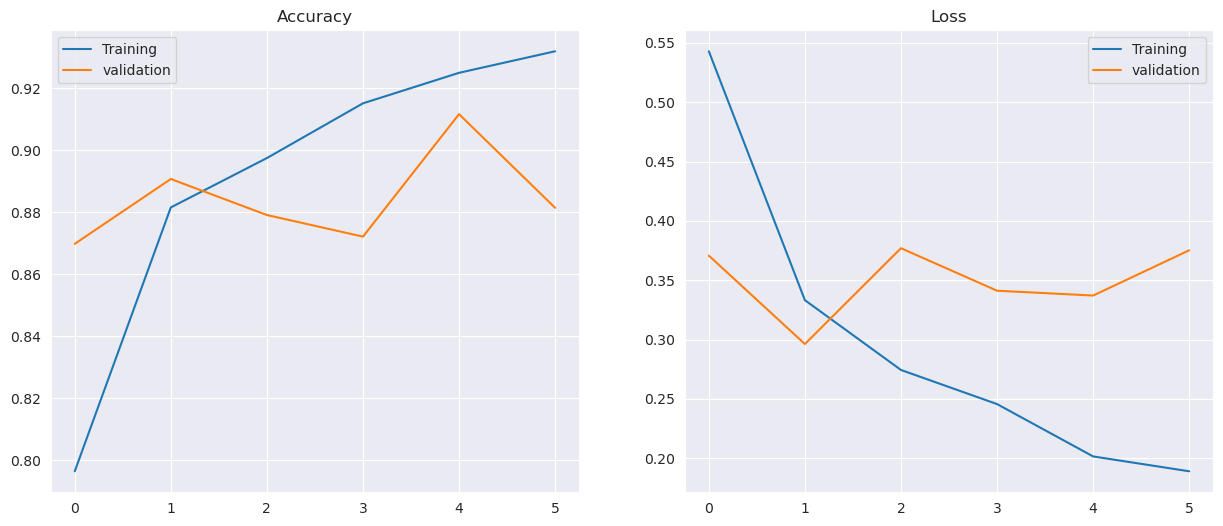

In [14]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

In [15]:
preds = model.predict(test_ds_3,verbose=1)

14/14 [==============================] - 2s 105ms/step


In [16]:
actual = test_ds_3.classes

In [17]:
pred = [np.argmax(i) for i in preds]
pred[:5]

[1, 0, 0, 0, 0]

In [18]:
print(classification_report(pred,actual))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        81
           1       0.87      0.95      0.91        97
           2       0.94      0.87      0.90        85
           3       0.93      0.81      0.87        85
           4       0.85      0.97      0.90        87

    accuracy                           0.89       435
   macro avg       0.89      0.89      0.89       435
weighted avg       0.89      0.89      0.89       435

